In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Organising dataset**

In [ ]:
%cd /content/drive/MyDrive/Crack dataset/
!unzip '/content/drive/MyDrive/Crack dataset/crack_segmentation_dataset.zip'

**Correcting file extensions, size, color of images**

In [ ]:
#@title
import os
for image in os.listdir("/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs"):
  old = image
  image = os.path.splitext(image)[0]
  os.rename(r'/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs/'+old,r'/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs/'+image)

In [ ]:
#@title
import os
import cv2
path = "/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs/"
for image in os.listdir(path):
  img = cv2.cv2.imread(path+image)
  img = cv2.resize(img, (448,448))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #print(img.shape)
  cv2.imwrite(path+image, img)
  

**Training**

In [ ]:

%cd /content/drive/My Drive/Unet/Pytorch-UNet/
!python train.py 
#!python predict.py --input "/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs/CFD_001.jpg"


In [ ]:
#renaming files as there was some issue, this isnt necessary all the time
import os
import shutil
path2 = "/content/drive/MyDrive/Crack dataset/crack_segmentation_dataset/train/images"
path1 = "/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs"
for image1 in os.listdir(path1):
  change = 0
  for image2 in os.listdir(path2):
    if(image1==image2):
      change = 1
      break 
  if(change==0):
    shutil.copy(path1+"/"+image1, "/content/drive/MyDrive/Unet/Pytorch-UNet/data/testing")

Testing

In [ ]:
%cd /content/drive/My Drive/Unet/Pytorch-UNet/
!python predict.py --model "/content/drive/MyDrive/Unet/Pytorch-UNet/checkpoints/CP_epoch5.pth" --input "/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs/cracktree200_6774.jpg" --output "/content/drive/MyDrive/Unet/Pytorch-UNet/data/outputs/output16.jpg"

/content/drive/My Drive/Unet/Pytorch-UNet
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Thresholding

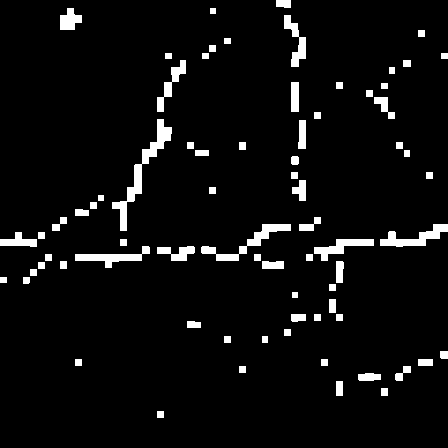

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

image = cv2.cv2.imread("/content/drive/MyDrive/Unet/Pytorch-UNet/data/imgs/cracktree200_6774.jpg")
image = image/255
image = np.where(image > 0.3, 1, 0)
image = image * 255
cv2_imshow(image)

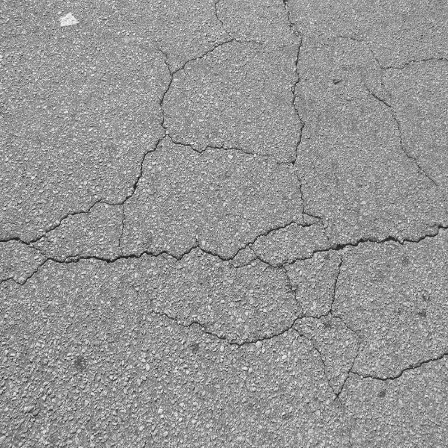

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.cv2.imread("/content/drive/MyDrive/Crack dataset/crack_segmentation_dataset/images/cracktree200_6774.jpg")
cv2_imshow(image)

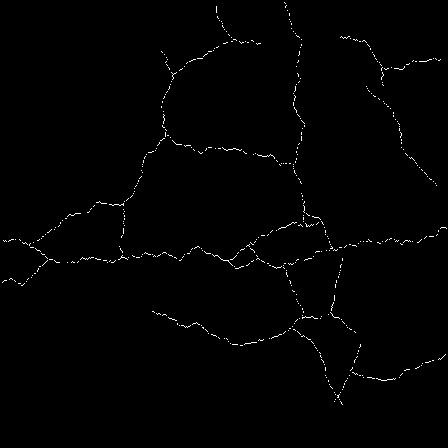

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.cv2.imread("/content/drive/MyDrive/Crack dataset/crack_segmentation_dataset/masks/cracktree200_6774.jpg")
cv2_imshow(image)

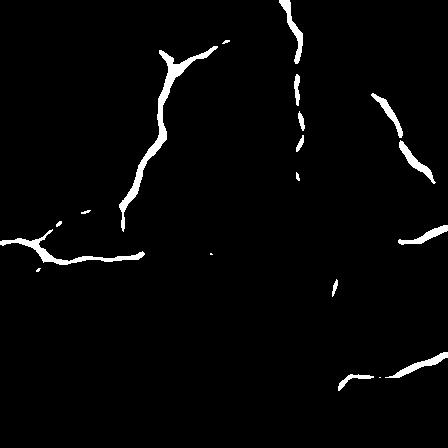

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.cv2.imread("/content/drive/MyDrive/Unet/Pytorch-UNet/data/outputs/output16.jpg")
cv2_imshow(image)

**Inference**

In [ ]:
import numpy as np
import glob
import cv2
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
def infer():
    ious = []
    # path1 = '/content/00a75abb-961a-41d8-b35a-a8cf92e290a5.jpg'
    # path2 = '/content/drive/MyDrive/crack_segmentation_dataset/images/'
    # imgs_path = glob.glob(path1 + '*')
    # org_path = glob.glob(path2 + '*')
    # count = 1
    # for img_path in org_path:
    #   %cd /content/dino/
    #   !python visualize_attention.py \
    #   --image_path img_path \
    
    imgs_path = '/content/drive/MyDrive/Unet/Pytorch-UNet/data/masks/cracktree200_6774.jpg'
    masks_path = '/content/drive/MyDrive/Unet/Pytorch-UNet/data/outputs/output16.jpg'
    img = cv2.cv2.imread(imgs_path)
    
    
    mask = cv2.cv2.imread(masks_path)
    #(thresh, mask) = cv2.threshold(cv2.cvtColor(cv2.imread(masks_path), cv2.COLOR_BGR2GRAY), 128, 255,
     #                              cv2.THRESH_BINARY)
    mask = cv2.resize(mask,(448,448)) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    # predicted = model.detect([img])[0]['masks'].astype(np.uint8).max(axis=-1) * 255
    #cv2.imshow('2', img)
    #cv2.imshow('1', mask)
    # cv2.waitKey()
    mask = mask.flatten()
    img = img.flatten()
    mask = mask/255
    img = img/255
    img = np.round(img)
    mask = np.round(mask)
    jac = jaccard_score(mask, img)
    f1 = f1_score(mask,img)
    print("jac is: ",jac, "f1 is: ",f1)
    ious.append(jac)
    #count += 1
      # except:
      #   print(f"exception occured image id {count}")
      #   count+=1
      #   pass

    return np.mean(ious)


iou = infer()
print(f"IOU avg test dataset  : {iou}")


jac is:  0.08273991183452017 f1 is:  0.1528343250861259
IOU avg test dataset  : 0.08273991183452017
